In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Steganography():
    def __init__(self,img):
        self.img = img
    
    def __int_to_bin(self,rgb):
        r, g, b = rgb
        return ('{0:08b}'.format(r),
                '{0:08b}'.format(g),
                '{0:08b}'.format(b))

    def __bin_to_int(self,rgb):
        r, g, b = rgb
        return (int(r, 2),
                int(g, 2),
                int(b, 2))

    def __merge_rgb(self,rgb1, rgb2):
        r1, g1, b1 = rgb1
        r2, g2, b2 = rgb2
        rgb = (r1[:4] + r2[:4],
               g1[:4] + g2[:4],
               b1[:4] + b2[:4])
        return rgb

    def encrypt(self, img1):
        #if img1.size[0] > self.img.size[0] or img1.size[1] > self.img.size[1]:
            #raise ValueError('Image 2 should not be larger than Image 1!')
        pixel_map1 = self.img.load()
        pixel_map2 = img1.load()

        new_image = Image.new(self.img.mode, self.img.size)
        pixels_new = new_image.load()

        for i in range(self.img.size[0]):
            for j in range(self.img.size[1]):
                rgb1 = self.__int_to_bin(pixel_map1[i, j])

                rgb2 = self.__int_to_bin((0, 0, 0))

                if i < img2.size[0] and j < img2.size[1]:
                    rgb2 = self.__int_to_bin(pixel_map2[i, j])

                rgb = self.__merge_rgb(rgb1, rgb2)

                pixels_new[i, j] = self.__bin_to_int(rgb)

        return new_image

    def dcrypt(self):

        pixel_map = self.img.load()

        new_image = Image.new(self.img.mode, self.img.size)
        pixels_new = new_image.load()

        original_size = self.img.size

        for i in range(self.img.size[0]):
            for j in range(self.img.size[1]):
                r, g, b = self.__int_to_bin(pixel_map[i, j])

                rgb = (r[4:] + '0000',
                       g[4:] + '0000',
                       b[4:] + '0000')

                pixels_new[i, j] = self.__bin_to_int(rgb)

                if pixels_new[i, j] != (0, 0, 0):
                    original_size = (i + 1, j + 1)

        new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

        return new_image

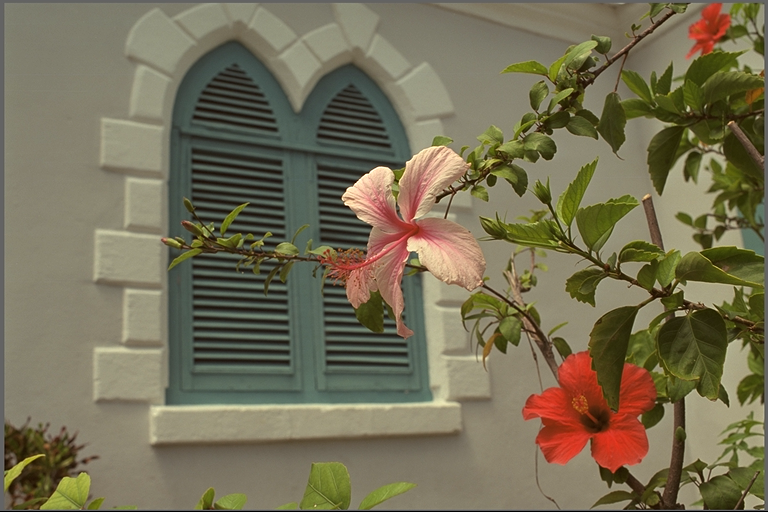

In [5]:
img1 = Image.open('kodim07.png')
img2 = Image.open('kodim08.png')
a = Steganography(img1)
new1 = a.encrypt(img2)
img1

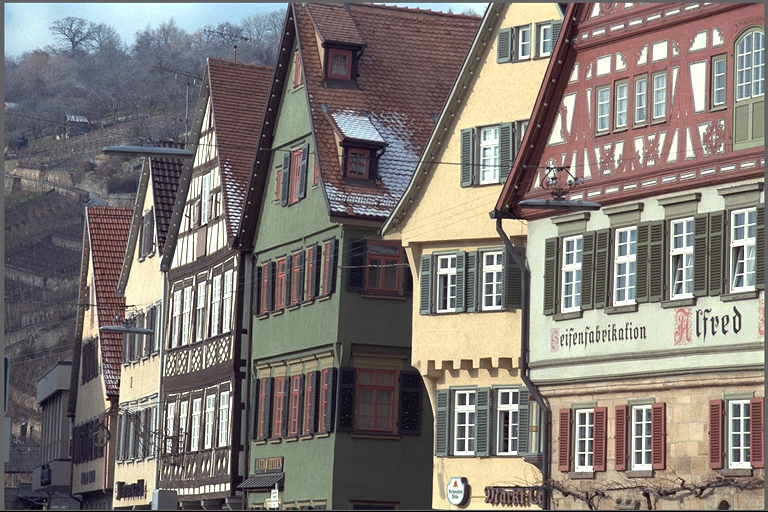

In [6]:
img2

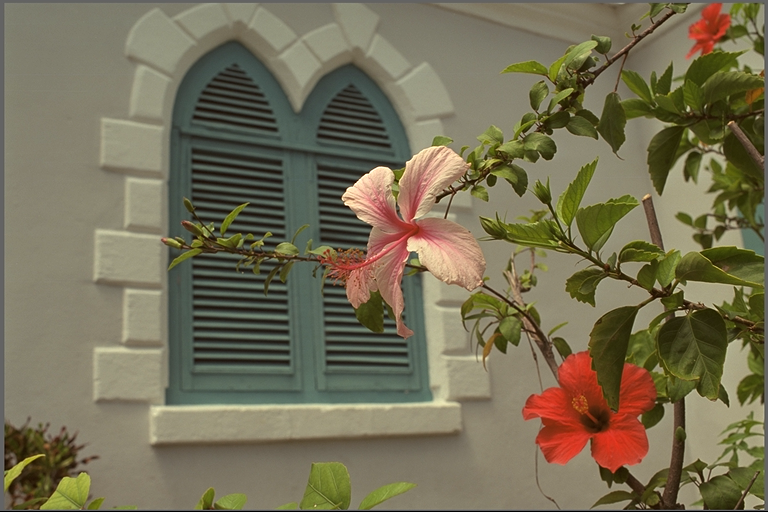

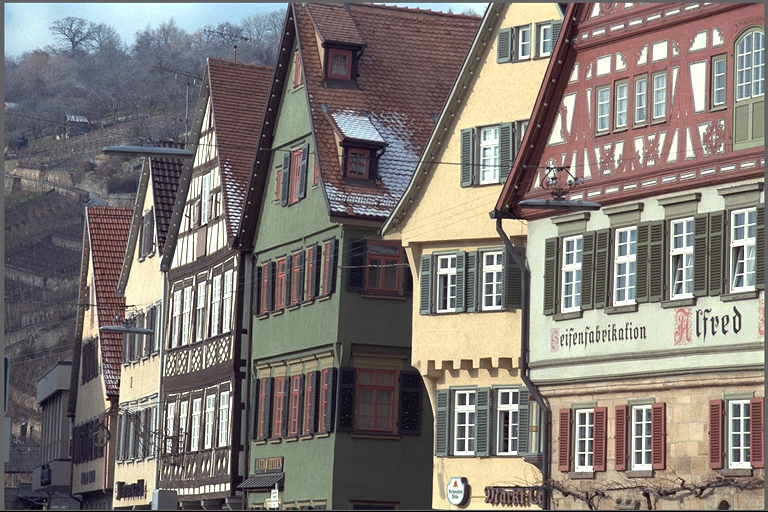

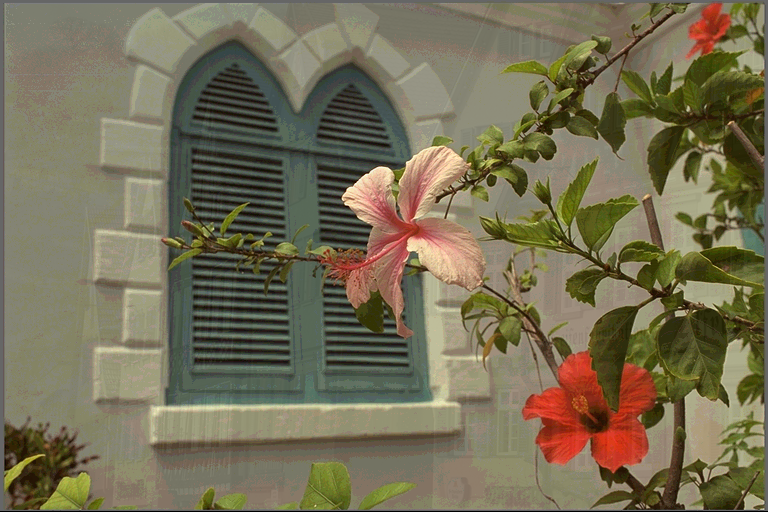

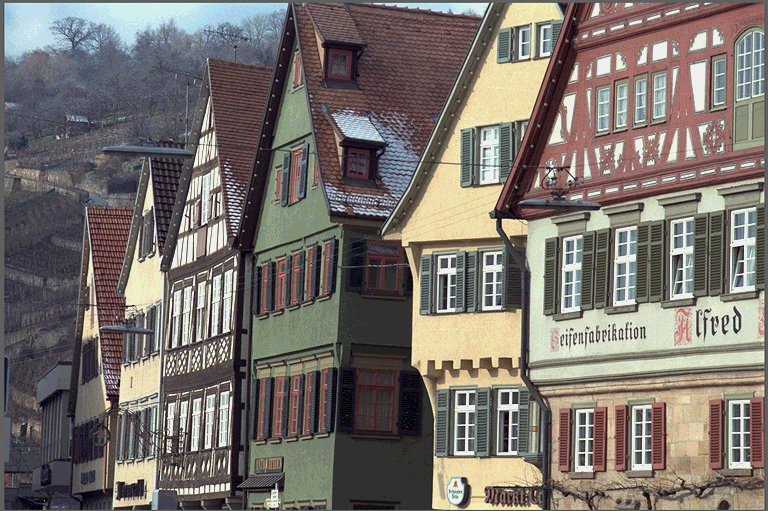

In [7]:
b = Steganography(new1)
#m.show()
n = b.dcrypt()
display(img1,img2,new1,n)

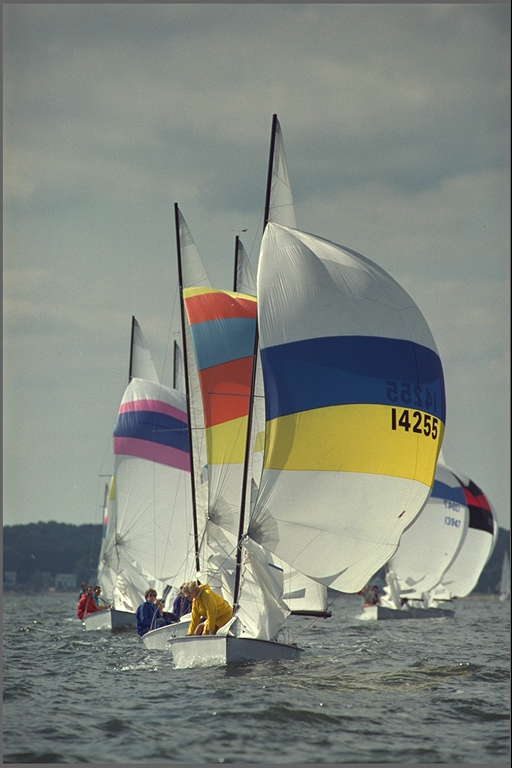

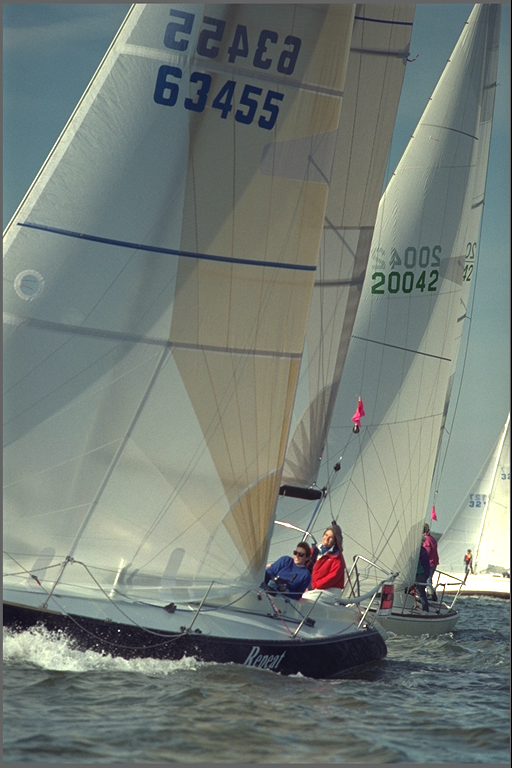

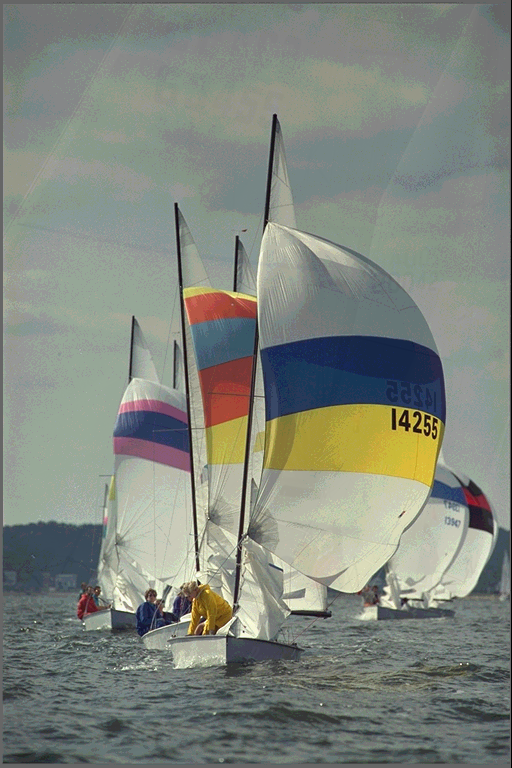

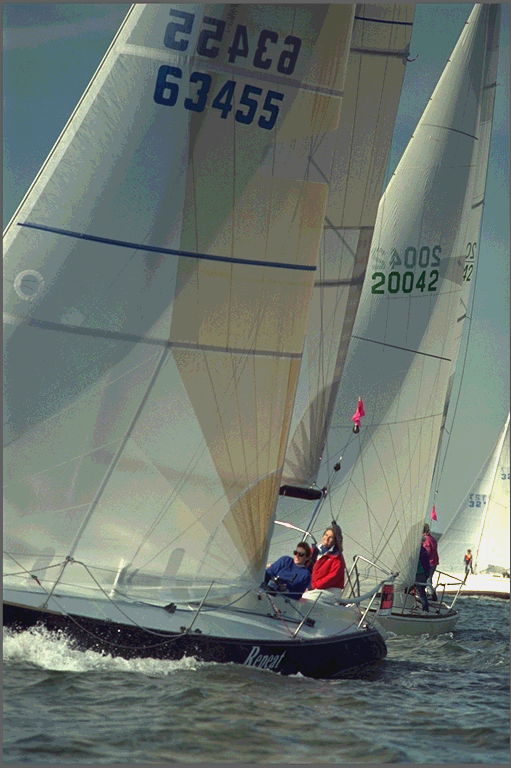

In [8]:
img1 = Image.open('kodim09.png')
img2 = Image.open('kodim10.png')
a = Steganography(img1)
new1 = a.encrypt(img2)
b = Steganography(new1)
#m.show()
n = b.dcrypt()
display(img1,img2,new1,n)

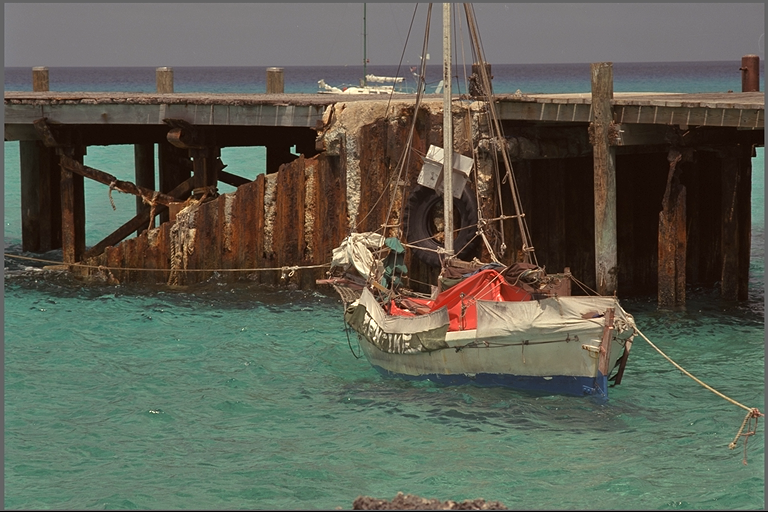

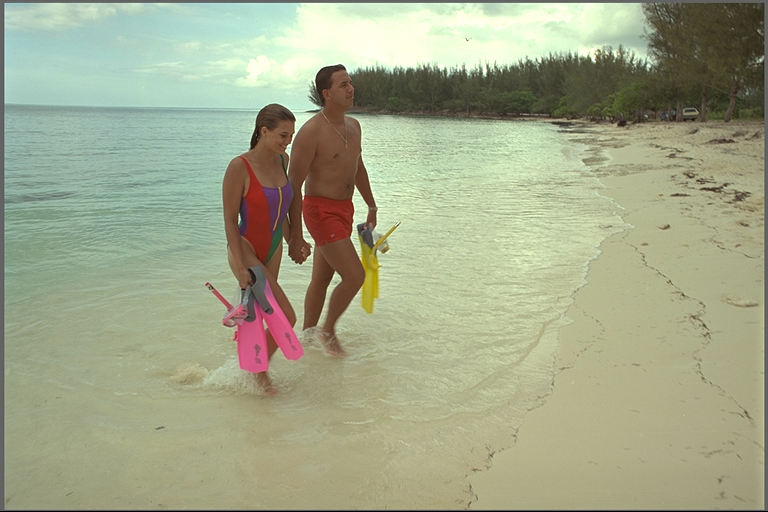

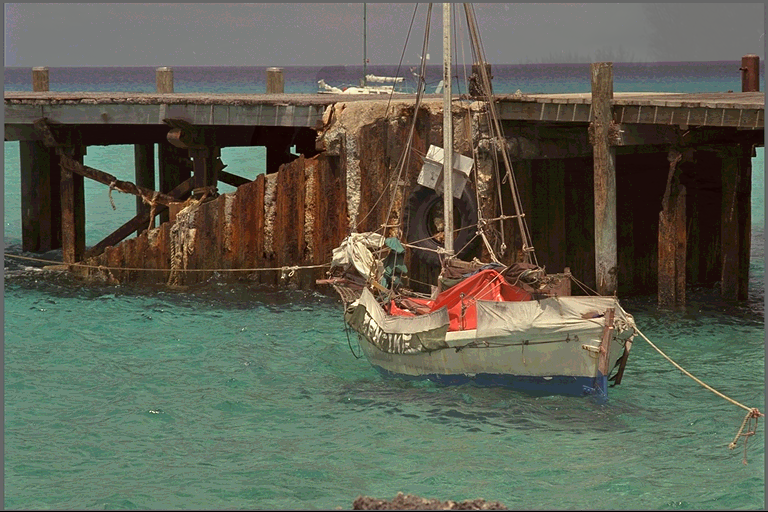

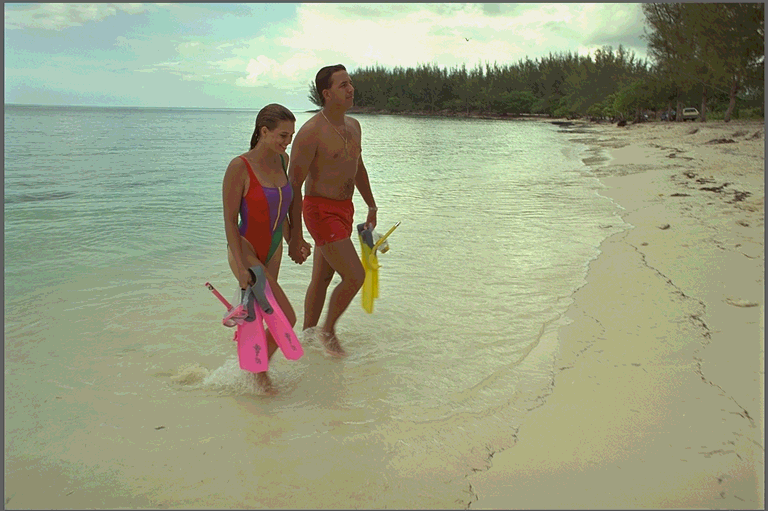

In [9]:
img1 = Image.open('kodim11.png')
img2 = Image.open('kodim12.png')
a = Steganography(img1)
new1 = a.encrypt(img2)
b = Steganography(new1)
#m.show()
n = b.dcrypt()
display(img1,img2,new1,n)